In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.chdir('C:\\Users\\PC\\Downloads')

data = pd.read_csv("exams.csv")
data.head(15)

,exam_1,exam_2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [2]:
dataMain = data.copy()

# Visualization

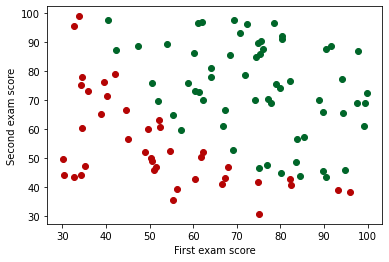

In [3]:
plt.xlabel("First exam score")
plt.ylabel("Second exam score")
plt.scatter(data[data['admitted']==1]['exam_1'],
            data[data['admitted']==1]['exam_2'] , color = '#006629')
plt.scatter(data[data['admitted']==0]['exam_1'],
            data[data['admitted']==0]['exam_2'] , color = '#b50404')

# Normalization

In [4]:
def normalize(col):
    mini = col.min()
    maxi = col.max()
    
    col = (col - mini)/(maxi-mini)
    return col

In [5]:
dataMain['exam_1'] = normalize(dataMain['exam_1'])
dataMain['exam_2'] = normalize(dataMain['exam_2'])

In [6]:
dataMain.head()

,exam_1,exam_2,admitted
0,0.065428,0.694655,0
1,0.003266,0.194705,0
2,0.082968,0.619618,0
3,0.431764,0.816001,1
4,0.701943,0.655392,1


# Cost Function

In [7]:
length = len(dataMain)

In [8]:
x0 = np.ones((length))
allX = np.array([x0 , dataMain['exam_1'] , dataMain['exam_2']]).T

In [9]:
allW = np.array([0,1,2])

In [10]:
def costFunction(y , h):
    return (-y * np.log(h) - (1-y) * np.log(1-h)).mean()

# Sigmoid Function

In [11]:
def sigmoidFunction(z):
    res = 1.0 / (1 + np.exp(-z))
    return res

# Predictions

In [12]:
def probabilityOfAdmitted(X , W):
    val = np.dot(X , W)
    p = sigmoidFunction(val)
    
    return p

In [13]:
def predict (X , W) :
    p = probabilityOfAdmitted(X , W)
    p [p<0.5] = 0
    p [p>=0.5] = 1
    
    return p

# Application of Gradient Descent

In [14]:
def gradientFunction(X , Y , W , alpha = 0.1 , iteration = 10000):
        
    costH = []
    length = len(Y)
    
    for i in range (0,iteration+1):
        x = np.dot(X , W)
        h = sigmoidFunction(x)
        g = np.dot(X.T , (h - dataMain['admitted']))/ len(dataMain['admitted'])
        W = W - alpha * g
        
        cost = costFunction(dataMain['admitted'],h)
        costH.append(cost)
        
        if i % 1000 == 0 :
            print("Iteration %d: "%i)
            print(cost)
            print()

        
    return W , costH 

In [15]:
updated_W , costs = gradientFunction(allX , dataMain['admitted'],allW)

Iteration 0: 
0.6255604816183551

Iteration 1000: 
0.34801080928232864

Iteration 2000: 
0.29426881687642426

Iteration 3000: 
0.26844507188718586

Iteration 4000: 
0.25313535034519297

Iteration 5000: 
0.24298402793609294

Iteration 6000: 
0.235768103445962

Iteration 7000: 
0.23038994833009635

Iteration 8000: 
0.22624167580137794

Iteration 9000: 
0.22295790919085184

Iteration 10000: 
0.22030513626343112



In [16]:
updated_W

array([-8.25308143,  9.42041549,  8.8389606 ])

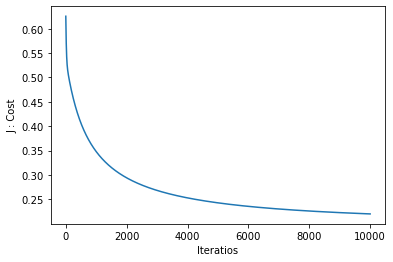

In [17]:
plt.plot(costs)
plt.ylabel('J : Cost')
plt.xlabel('Iteratios')

plt.show()

In [18]:
print(predict(allX , updated_W))

[0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 1.]


# Visualization(2) of Decreasing Cost Function

In [19]:
from plotly import __version__
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [20]:
import cufflinks as cf

In [21]:
cf.go_offline()

In [22]:
pd.DataFrame(costs).reset_index().iplot(kind = 'line' , x = 'index' , y = 0 , xTitle = '# of Iterations' , yTitle = 'Cost Function Vale')

# Decision Boundary

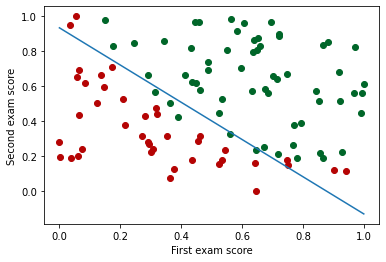

In [23]:
plt.xlabel("First exam score")
plt.ylabel("Second exam score")
plt.scatter(dataMain[dataMain['admitted']==1]['exam_1'],
            dataMain[dataMain['admitted']==1]['exam_2'] , color = '#006629')
plt.scatter(dataMain[dataMain['admitted']==0]['exam_1'],
            dataMain[dataMain['admitted']==0]['exam_2'] , color = '#b50404')

xLine = [np.min(dataMain['exam_1']), np.max(dataMain['exam_1'])]
yLine = - (updated_W[0] + np.dot(updated_W[1],xLine))/updated_W[2]
         
plt.plot(xLine, yLine)

# Compare Predicted and Actual Ones

In [26]:
listReal = np.array(dataMain['admitted'])
compareDF = pd.DataFrame(listReal)

compareDF.columns = ['Admitted']
compareDF['Prediction'] = predict(allX , updated_W)

In [27]:
compareDF.head()

,Admitted,Prediction
0,0,0.0
1,0,0.0
2,0,0.0
3,1,1.0
4,1,1.0


In [28]:
accuracy = len((compareDF[compareDF['Admitted'] == compareDF['Prediction']])) / len(compareDF)
print("Accuracy of this model : ",accuracy)

Accuracy of this model :  0.89


# Test1

In [29]:
exam_1 = 55
exam_2 = 70
admitted = 1

exam_1 = (exam_1 - data['exam_1'].min()) / (data['exam_1'].max() - data['exam_1'].min())
exam_2 = (exam_2 - data['exam_2'].min()) / (data['exam_2'].max() - data['exam_2'].min())

In [30]:
inputs = np.array([1.0 , exam_1 , exam_2]).T

In [31]:
if (probabilityOfAdmitted(inputs , updated_W) >= 0.5) :
    print(1)
else :
    print(0)

1


# Test2

In [32]:
exam_1 = 20
exam_2 = 10
admitted = 0

exam_1 = (exam_1 - data['exam_1'].min()) / (data['exam_1'].max() - data['exam_1'].min())
exam_2 = (exam_2 - data['exam_2'].min()) / (data['exam_2'].max() - data['exam_2'].min())

In [33]:
inputs = np.array([1.0 , exam_1 , exam_2]).T

In [34]:
if (probabilityOfAdmitted(inputs , updated_W) >= 0.5) :
    print(1)
else :
    print(0)

0


# Logistic Regression Library

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [36]:
X = data.drop('admitted' , axis = 1)
Y = data['admitted']

In [37]:
lg = LogisticRegression()
lg.fit(X , Y)

LogisticRegression()

In [38]:
lg.predict(X)

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

# Testing with library

In [40]:
X_test1 = [[55,70]]
print(lg.predict(X_test1))

[1]


In [41]:
X_test2 = [[45,50]]
print(lg.predict(X_test2))

[0]


# Save pickle model

In [42]:
import pickle

filename = 'finalized_model.pkl'
pickle.dump(lg , open(filename , 'wb'))

loaded_model = pickle.load(open(filename , 'rb'))

In [43]:
loaded_model.predict([[55,70]])

array([1], dtype=int64)

# Accuracy Model % of the Model

In [44]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

In [45]:
print("Accuracy : ",lg.score(X,Y)) # OR accuracy_score(data['admitted'] , lg.predict(data[['exam_1','exam_2']])))

print("Recall : ", recall_score(data['admitted'] , lg.predict(data[['exam_1','exam_2']])))

print("Precision : ", precision_score(data['admitted'] , lg.predict(data[['exam_1','exam_2']])))

print("Coefficient of features respectively : ",lg.coef_)

Accuracy :  0.89
Recall :  0.9166666666666666
Precision :  0.9016393442622951
Coefficient of features respectively :  [[0.20535491 0.2005838 ]]
